Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64
Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       6014
WindGustSpeed     6001
WindDir9am        7557
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      11215
Pressure3pm      11151
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64
Date    

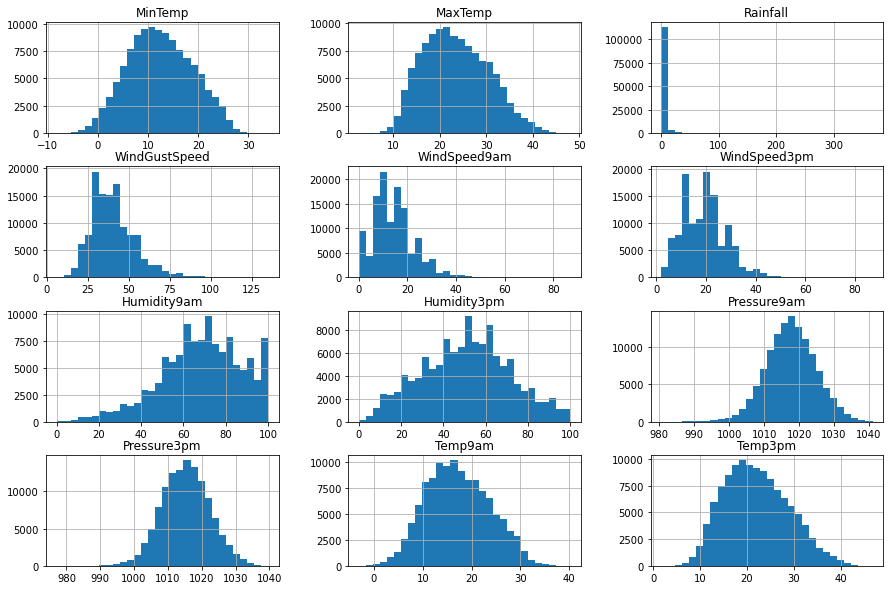

In [11]:

#%% Importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#%% Loading Data
dt = pd.read_csv("weatherAUS.csv")

summaryMath = dt.describe()
summaryAll = dt.describe(include='all')
print(dt.isna().sum())



#%% Cleaning Data

# Remove Cloumns: Cloud 9am Cloud 3pm Evaporation Sunshine. Too many missing values
dt = dt.drop(columns=['Cloud9am','Cloud3pm', 'Evaporation', 'Sunshine'])

# Remove Rows of few na
dt = dt.dropna(subset=['MinTemp','MaxTemp','Rainfall','WindDir3pm','WindSpeed9am',
                      'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
                      'Temp9am','Temp3pm','RainToday','RainTomorrow'])

print(dt.isna().sum())

# NA Values  overlap completely so it is worth keeping for both columns
dt = dt.dropna(subset=['WindGustDir'])


dt = dt.dropna(subset=['Pressure9am','Pressure3pm'])

# Already have more recent data so not really worth keeping
dt = dt.drop(columns=['WindDir9am'])
print(dt.isna().sum()) 

# Data is clean of missing values

#%% Histogram
dt.hist(bins=30, figsize=(15,10))

#%% Cleaning String values
dt['Date'] = dt['Date'].astype('string')

dt['Year'] = dt['Date'].str.slice(stop=4).astype(int) - 2007
dt['Month'] = dt['Date'].str.slice(start=6, stop=7)
dt['Day'] = dt['Date'].str.slice(start=8)

# Not including day column because there aren't samples for that level
# of granularity to be useful

dt = dt.drop(columns=['Date'])

dt = pd.get_dummies(data=dt, columns=['Location', 'WindGustDir','WindDir3pm'])
#dt = pd.get_dummies(data=dt, columns=['Year','Month', 'Location', 'WindGustDir','WindDir3pm'])

dt['RainToday'].astype('string')
dt['RainTomorrow'].astype('string')

dt['RainToday'] = dt['RainToday'].map({'Yes': 1, 'No': 0})
dt['RainTomorrow'] = dt['RainTomorrow'].map({'Yes': 1, 'No': 0})

dt['Last_days'] = dt['RainTomorrow'].rolling(15).sum().shift(1)

dt['Last_days'] = dt['Last_days'].fillna(0)

#%%

from sklearn.model_selection import train_test_split

X = dt.drop(columns='RainTomorrow')
y = dt['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## NORMALIZATION INCREASES ACCURACY +1%
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

print(X_train.shape)
#%%
input_shape = (111)

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers import InputLayer
from keras.optimizers import Adam

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

"""model = Sequential()

model.add(Dense(93,input_shape=(93,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer="adam",
              loss="binary_crossentropy", 
              metrics=["accuracy"])

tracker = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test,y_test))"""

"""fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tracker.history["accuracy"], label = "training_accuracy")
ax.plot(tracker.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
ax.legend(loc = 'best', shadow = True,)
plt.show()

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(tracker.history["loss"], label = "training_loss")
ax.plot(tracker.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()

y_pred = model.predict(X_test)

y_pred = np.rint(y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print(cm)"""

########## RESULTS ##########

###############################
## NO DROPOUT
##
#               precision    recall  f1-score   support

#           0       0.88      0.95      0.92     27893
#           1       0.77      0.55      0.65      7808

#    accuracy                           0.87     35701
#   macro avg       0.83      0.75      0.78     35701
#weighted avg       0.86      0.87      0.86     35701

#                  PREDICTED
#                 0      1
# ACTUAL      0 [26612  1281]
#             1 [ 3479  4329]

###############################
## DROPOUT .2
##
#               precision    recall  f1-score   support

#           0       0.89      0.95      0.92     27893
 #          1       0.75      0.58      0.65      7808 

 #   accuracy                           0.87     35701
 #  macro avg       0.82      0.76      0.79     35701
#weighted avg       0.86      0.87      0.86     35701

#                  PREDICTED
#                 0      1
# ACTUAL      0 [26408  1485]
#             1 [ 3288  4520]

###############################
## DROPOUT .3
##
#               precision    recall  f1-score   support
#
#           0       0.87      0.97      0.91     27792
#           1       0.82      0.47      0.60      7909

#    accuracy                           0.86     35701
#   macro avg       0.84      0.72      0.76     35701
#weighted avg       0.85      0.86      0.84     35701

#                  PREDICTED
#                 0      1
# ACTUAL      0 [26946   846]
#             1 [ 4164  3745]

###############################

#%% Synthetic Minority Oversampling Technique (SMOTE)

from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

model2 = Sequential()

model2.add(Dense(93,input_shape=(93,),activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))


model2.compile(optimizer="adam",
              loss="binary_crossentropy", 
              metrics=["accuracy"])

tracker = model2.fit(X_train_res, y_train_res, epochs=20, batch_size=32, validation_data=(X_test,y_test))

"""fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tracker.history["accuracy"], label = "training_accuracy")
ax.plot(tracker.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
ax.legend(loc = 'best', shadow = True,)
plt.show()

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(tracker.history["loss"], label = "training_loss")
ax.plot(tracker.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()"""




y_pred = model2.predict(X_test)

y_pred = np.rint(y_pred)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print(cm)

########## RESULTS ##########

###############################
#              precision    recall  f1-score   support

#           0       0.93      0.84      0.88     27904
#           1       0.57      0.77      0.66      7797

#    accuracy                           0.82     35701
#   macro avg       0.75      0.80      0.77     35701
#weighted avg       0.85      0.82      0.83     35701

#                  PREDICTED
#                 0      1
# ACTUAL      0 [23414  4490]
#             1 [ 1796  6001]

#  https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# Worked Surpisingly well. Will be more likely to give a false positive than a false negative.
# Still not great on predicting positve class.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc_upsample = RandomForestClassifier(random_state=0)
rfc_upsample.fit(X_train_res, y_train_res)
accuracy = accuracy_score(rfc_upsample.predict(X_test), y_test)
print('my obtained accuracy on RandomForestsClassifier: {0}'.format(accuracy))

my obtained accuracy on RandomForestsClassifier: 0.8500063022562078


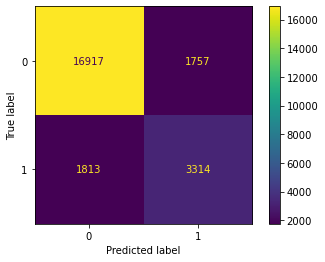

In [8]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc_upsample, X_test, y_test)
plt.show()

In [9]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
accuracy = accuracy_score(rfc.predict(X_test), y_test)
print('my obtained accuracy on RandomForestsClassifier: {0}'.format(accuracy))

my obtained accuracy on RandomForestsClassifier: 0.8607621528507206


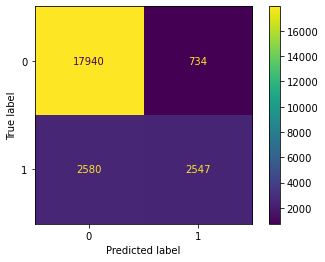

In [10]:
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

Model accuracy score: 0.8066


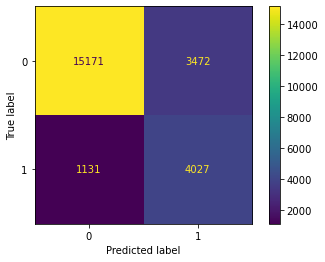

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train_res, y_train_res)
y_pred_test_2 = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_2)))

plot_confusion_matrix(logreg, X_test, y_test)
plt.show()